In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [4]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [5]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [7]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [8]:
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

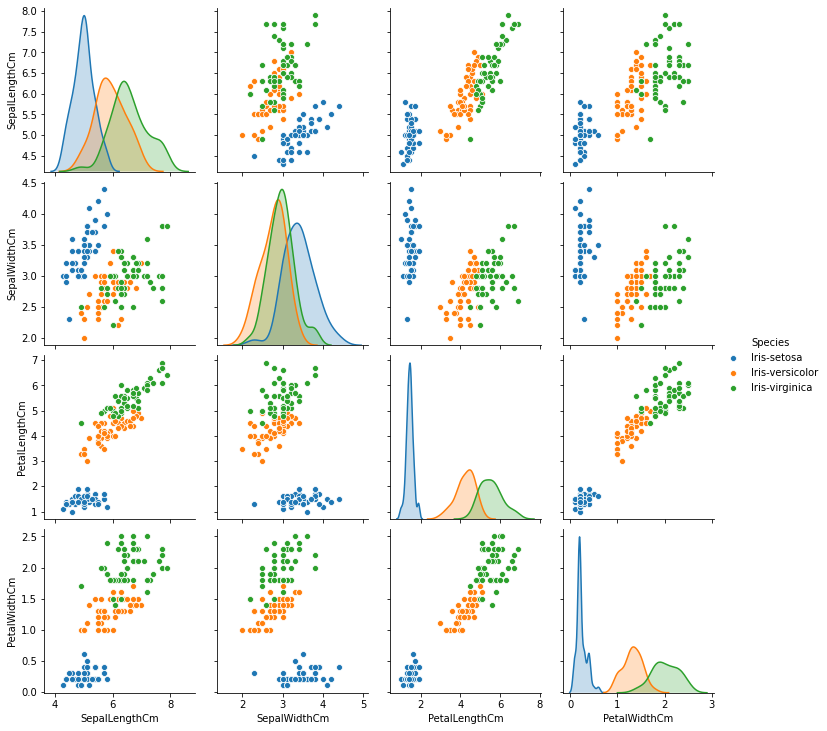

In [9]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

In [10]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [12]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

In [13]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [14]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [99]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0_main = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1_main = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

In [110]:
print(w0_main)
print(w1_main)

[[-0.08084026  0.97437055  0.58082772  0.60664824  0.26628094]
 [ 0.09621357  0.08714558 -0.70840549 -0.50329933  0.22454125]
 [ 0.3143109   0.63045202  0.5563534   0.97348416 -0.1873678 ]
 [-0.73381026  0.35358294 -0.28077337 -0.65760382 -0.0724039 ]]
[[ 0.10667271 -0.80573458  0.72433128]
 [ 0.28316061 -0.71157278 -0.17685397]
 [ 0.060788   -0.50515186  0.92893724]
 [ 0.37408983 -0.16584432 -0.57855113]
 [-0.30769024  0.70841471  0.9423166 ]]


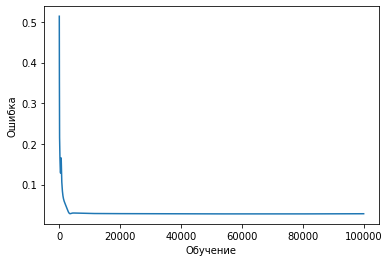

Точность нейронной сети 97.19%


In [102]:
w0 = w0_main.copy()
w1 = w1_main.copy()
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [103]:
# Итерация с минимальной ошибкой
err = pd.Series(errors)
iter_min_err = err.idxmin()
print(iter_min_err)

68146


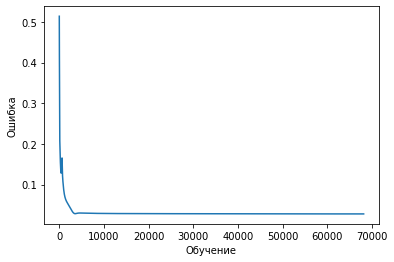

Точность нейронной сети 97.23%


In [104]:
# Посмотрим какой будет результат на итерации с минимальной ошибкой
w0 = w0_main.copy()
w1 = w1_main.copy()
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(iter_min_err):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Немного улучшили результат

Попробуем увеличить скорость обучения

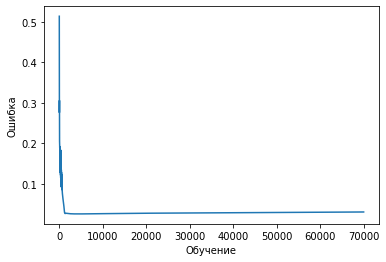

Точность нейронной сети 96.97%


In [107]:
# скорость обучения (learning rate)
n = 0.2
w0 = w0_main.copy()
w1 = w1_main.copy()
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(70000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Модель стала хуже, но из графика ошибок видно, что на первых итерациях ошибка была меньше

In [108]:
err = pd.Series(errors)
iter_min_err = err.idxmin()
print(iter_min_err)

4376


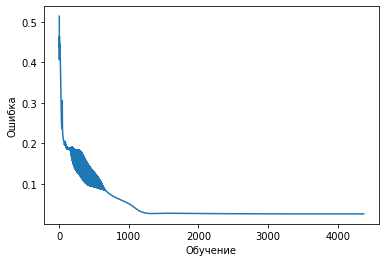

Точность нейронной сети 97.44%


In [109]:
# скорость обучения (learning rate)
n = 0.2
w0 = w0_main.copy()
w1 = w1_main.copy()
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(iter_min_err):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Результат стал луче.

Теперь попробуем увелисить число нейронов внутреннего слоя.

In [111]:
w0_main = 2*np.random.random((4, 7)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1_main = 2*np.random.random((7, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

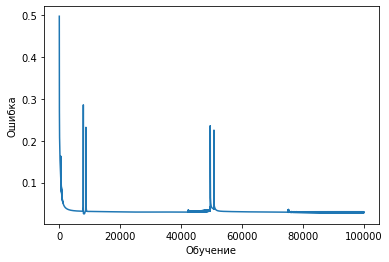

Точность нейронной сети 97.21%


In [112]:
w0 = w0_main.copy()
w1 = w1_main.copy()
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Результат стал хуже чем у предыдущей модели,но как видно из графика ошибка у нас очень сильно прыгает, проверим минимальное значение.

In [113]:
err = pd.Series(errors)
iter_min_err = err.idxmin()
print(iter_min_err)

8151


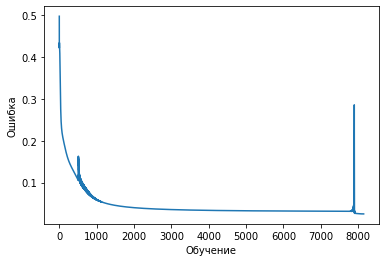

Точность нейронной сети 97.49%


In [114]:
w0 = w0_main.copy()
w1 = w1_main.copy()
# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(iter_min_err):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Пока это наилучший результат.

In [136]:
w0_main = 2*np.random.random((4, 15)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1_main = 2*np.random.random((15, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

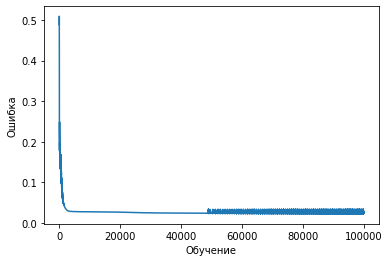

Точность нейронной сети 97.47%


In [137]:
w0 = w0_main.copy()
w1 = w1_main.copy()
# скорость обучения (learning rate)
n = 0.2
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [138]:
err = pd.Series(errors)
iter_min_err = err.idxmin()
print(iter_min_err)

99814


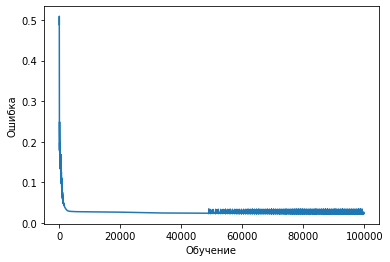

Точность нейронной сети 97.4%


In [140]:
w0 = w0_main.copy()
w1 = w1_main.copy()
# скорость обучения (learning rate)
n = 0.2
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
for i in range(iter_min_err):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Результат стал хуже. 

Наилучшая модель с точностью 97.49% за 8151 итераций и 7 нейронами внутреннего слоя.